In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

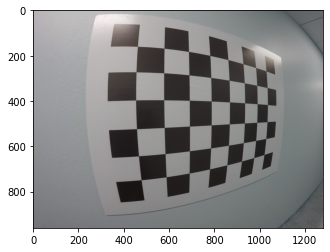

In [48]:
img = cv2.imread('calibration_wide/GOPR0032.jpg')
plt.imshow(img)

In [28]:
imgpoints = [] # 2D points in image plane
objpoints = [] # 3D points in real world space

In [29]:
objp = np.zeros((6*8, 3), np.float32)
objp.shape

(48, 3)

In [30]:
objp

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [31]:
grid_mat = np.mgrid[0:8, 0:6]
grid_mat.shape

(2, 8, 6)

In [32]:
grid_mat

array([[[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7]],

       [[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]])

In [33]:
grid_mat_T = grid_mat.T
grid_mat_T.shape

(6, 8, 2)

In [34]:
grid_mat_T

array([[[0, 0],
        [1, 0],
        [2, 0],
        [3, 0],
        [4, 0],
        [5, 0],
        [6, 0],
        [7, 0]],

       [[0, 1],
        [1, 1],
        [2, 1],
        [3, 1],
        [4, 1],
        [5, 1],
        [6, 1],
        [7, 1]],

       [[0, 2],
        [1, 2],
        [2, 2],
        [3, 2],
        [4, 2],
        [5, 2],
        [6, 2],
        [7, 2]],

       [[0, 3],
        [1, 3],
        [2, 3],
        [3, 3],
        [4, 3],
        [5, 3],
        [6, 3],
        [7, 3]],

       [[0, 4],
        [1, 4],
        [2, 4],
        [3, 4],
        [4, 4],
        [5, 4],
        [6, 4],
        [7, 4]],

       [[0, 5],
        [1, 5],
        [2, 5],
        [3, 5],
        [4, 5],
        [5, 5],
        [6, 5],
        [7, 5]]])

In [35]:
grid_mat_T.reshape(-1, 2) # (48, 2)

array([[0, 0],
       [1, 0],
       [2, 0],
       [3, 0],
       [4, 0],
       [5, 0],
       [6, 0],
       [7, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1],
       [5, 1],
       [6, 1],
       [7, 1],
       [0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 2],
       [6, 2],
       [7, 2],
       [0, 3],
       [1, 3],
       [2, 3],
       [3, 3],
       [4, 3],
       [5, 3],
       [6, 3],
       [7, 3],
       [0, 4],
       [1, 4],
       [2, 4],
       [3, 4],
       [4, 4],
       [5, 4],
       [6, 4],
       [7, 4],
       [0, 5],
       [1, 5],
       [2, 5],
       [3, 5],
       [4, 5],
       [5, 5],
       [6, 5],
       [7, 5]])

In [36]:
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2) # x, y coordinates
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [7., 5

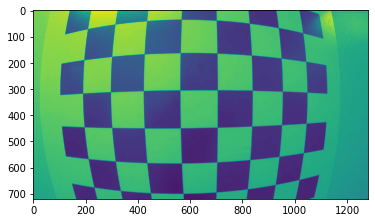

In [38]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [41]:
ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
ret, corners.shape, corners

(True,
 (48, 1, 2),
 array([[[ 209.49168 ,   72.759445]],
 
        [[ 314.52362 ,   54.58995 ]],
 
        [[ 435.51456 ,   42.035755]],
 
        [[ 567.81757 ,   36.470123]],
 
        [[ 702.005   ,   40.031147]],
 
        [[ 827.8688  ,   51.39282 ]],
 
        [[ 938.9422  ,   68.43589 ]],
 
        [[1032.1531  ,   88.22164 ]],
 
        [[ 195.65141 ,  190.71077 ]],
 
        [[ 301.68405 ,  178.15556 ]],
 
        [[ 426.42334 ,  168.19281 ]],
 
        [[ 563.9286  ,  163.79163 ]],
 
        [[ 704.30273 ,  165.36145 ]],
 
        [[ 835.97034 ,  172.888   ]],
 
        [[ 949.44946 ,  184.23866 ]],
 
        [[1043.4532  ,  197.34889 ]],
 
        [[ 190.99168 ,  317.9877  ]],
 
        [[ 297.00378 ,  312.99814 ]],
 
        [[ 423.02908 ,  308.16754 ]],
 
        [[ 562.5084  ,  305.60114 ]],
 
        [[ 705.7149  ,  305.5154  ]],
 
        [[ 838.9999  ,  307.0742  ]],
 
        [[ 954.1834  ,  310.37695 ]],
 
        [[1048.1006  ,  314.29034 ]],
 
        [[ 196.98315

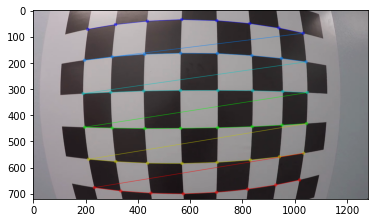

In [42]:
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
    plt.imshow(img)

# Final Code

In [2]:
images = glob.glob('calibration_wide/GOPR*.jpg')
images

['calibration_wide/GOPR0034.jpg',
 'calibration_wide/GOPR0035.jpg',
 'calibration_wide/GOPR0037.jpg',
 'calibration_wide/GOPR0036.jpg',
 'calibration_wide/GOPR0032.jpg',
 'calibration_wide/GOPR0033.jpg',
 'calibration_wide/GOPR0057.jpg',
 'calibration_wide/GOPR0043.jpg',
 'calibration_wide/GOPR0042.jpg',
 'calibration_wide/GOPR0068.jpg',
 'calibration_wide/GOPR0040.jpg',
 'calibration_wide/GOPR0054.jpg',
 'calibration_wide/GOPR0055.jpg',
 'calibration_wide/GOPR0041.jpg',
 'calibration_wide/GOPR0069.jpg',
 'calibration_wide/GOPR0045.jpg',
 'calibration_wide/GOPR0051.jpg',
 'calibration_wide/GOPR0050.jpg',
 'calibration_wide/GOPR0044.jpg',
 'calibration_wide/GOPR0052.jpg',
 'calibration_wide/GOPR0046.jpg',
 'calibration_wide/GOPR0047.jpg',
 'calibration_wide/GOPR0053.jpg',
 'calibration_wide/GOPR0062.jpg',
 'calibration_wide/GOPR0063.jpg',
 'calibration_wide/GOPR0049.jpg',
 'calibration_wide/GOPR0061.jpg',
 'calibration_wide/GOPR0060.jpg',
 'calibration_wide/GOPR0048.jpg',
 'calibration_

In [3]:
imgpoints = [] # 2D points in image plane
objpoints = [] # 3D points in real world space

In [4]:
objp = np.zeros((6*8, 3), np.float32)
objp.shape

(48, 3)

In [5]:
objp[:, :2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2) # x, y coordinates
objp

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [7., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [7., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [7., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [7., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [7., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [7., 5

In [6]:
for fname in images:
    img = cv2.imread(fname)
#     plt.imshow(img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     plt.imshow(gray)
    
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
    
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

#         img = cv2.drawChessboardCorners(img, (8, 6), corners, ret)
#         plt.imshow(img)

In [7]:
gray.shape, gray.shape[::-1]

((960, 1280), (1280, 960))

In [8]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [9]:
ret

0.562390719880109

In [10]:
mtx

array([[560.26831363,   0.        , 651.26205498],
       [  0.        , 561.31870939, 499.05498085],
       [  0.        ,   0.        ,   1.        ]])

In [11]:
dist

array([[-2.32876385e-01,  6.16788766e-02, -1.40234750e-05,
         3.81911253e-05, -7.54075161e-03]])

In [12]:
rvecs

[array([[ 0.05157834],
        [ 0.02647591],
        [-0.01095365]]),
 array([[ 0.14100897],
        [-0.03901032],
        [ 0.00317216]]),
 array([[0.14840919],
        [0.19125282],
        [0.03749649]]),
 array([[0.08921697],
        [0.28755799],
        [0.00591605]]),
 array([[ 0.09306665],
        [-0.32462786],
        [-0.02489937]]),
 array([[ 0.11258531],
        [-0.18661716],
        [-0.03802112]]),
 array([[ 0.26662305],
        [ 0.01759104],
        [-0.01494933]]),
 array([[ 0.1556427 ],
        [-0.33451762],
        [-0.05607521]]),
 array([[ 0.11144851],
        [-0.05243467],
        [-0.01676803]]),
 array([[ 0.14575066],
        [-0.97042556],
        [-0.28910584]]),
 array([[ 0.45374323],
        [-0.0571105 ],
        [-0.01007127]]),
 array([[0.28749906],
        [0.22237194],
        [0.01047463]]),
 array([[ 0.34135846],
        [-0.02712933],
        [-0.01567487]]),
 array([[ 0.12061928],
        [-0.66197881],
        [-0.08463882]]),
 array([[ 0.108

In [13]:
tvecs

[array([[-3.50018305],
        [-2.74871525],
        [ 3.71709327]]),
 array([[-3.42974137],
        [-2.17458821],
        [ 3.44206999]]),
 array([[-4.57138179],
        [-1.98795662],
        [ 4.40949905]]),
 array([[-4.02840654],
        [-2.47114165],
        [ 4.56864129]]),
 array([[-1.56150218],
        [-2.78547662],
        [ 4.06235292]]),
 array([[-2.10062283],
        [-2.8155379 ],
        [ 5.97157704]]),
 array([[-3.4634057 ],
        [-1.51247453],
        [ 2.75550076]]),
 array([[-0.81918099],
        [-2.89988257],
        [ 7.39172098]]),
 array([[-3.59907569],
        [-2.69497143],
        [ 7.04283748]]),
 array([[-1.57517953],
        [-0.67783013],
        [13.8134479 ]]),
 array([[-3.1256127 ],
        [-0.99546662],
        [ 2.71000295]]),
 array([[-4.67129571],
        [-1.72890035],
        [ 3.64281598]]),
 array([[-3.05861672],
        [-1.4123219 ],
        [ 2.69155232]]),
 array([[-1.95677229],
        [ 0.41512263],
        [12.03141001]]),
 array

In [14]:
img = cv2.imread('calibration_wide/GOPR0032.jpg')

In [15]:
dst = cv2.undistort(img, mtx, dist, None, mtx)
dst

array([[[183, 182, 184],
        [182, 181, 183],
        [181, 180, 182],
        ...,
        [143, 145, 145],
        [143, 145, 145],
        [143, 145, 145]],

       [[180, 179, 181],
        [181, 180, 182],
        [181, 180, 182],
        ...,
        [143, 145, 145],
        [143, 145, 145],
        [143, 145, 145]],

       [[175, 174, 176],
        [175, 174, 176],
        [176, 175, 177],
        ...,
        [143, 145, 145],
        [143, 145, 145],
        [142, 144, 144]],

       ...,

       [[130, 131, 135],
        [130, 131, 135],
        [130, 131, 135],
        ...,
        [107, 112, 113],
        [108, 113, 114],
        [108, 113, 114]],

       [[132, 133, 137],
        [130, 131, 135],
        [130, 131, 135],
        ...,
        [107, 112, 113],
        [107, 112, 113],
        [108, 113, 114]],

       [[131, 132, 136],
        [131, 132, 136],
        [131, 132, 136],
        ...,
        [107, 112, 113],
        [107, 112, 113],
        [107, 112, 113]]

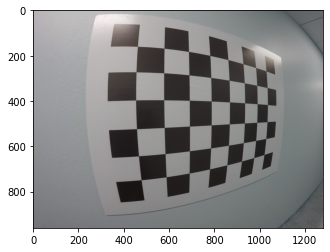

In [16]:
plt.imshow(img)

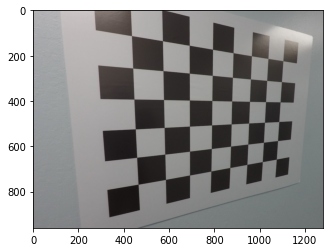

In [17]:
plt.imshow(dst)

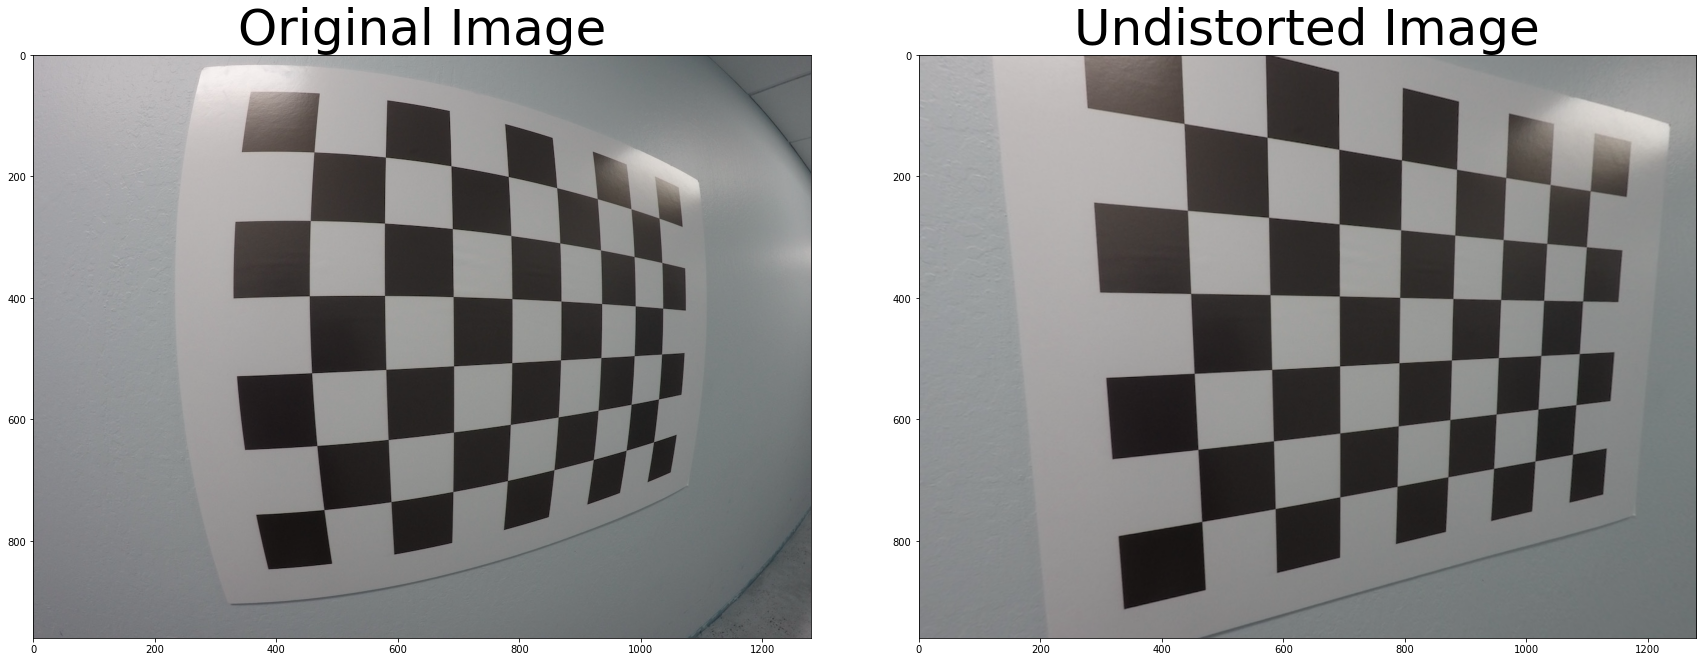

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)